## Лабораторная работа №1. Машинное обучение.

Выполнил: Ноздрин В.Я. группа 9383



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from scipy.stats import norm
import seaborn as sb

In [25]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df = df.drop(columns = [
    'anaemia',
    'diabetes',
    'high_blood_pressure',
    'sex',
    'smoking',
    'time',
    'DEATH_EVENT'
])
print(df)

      age  creatinine_phosphokinase  ejection_fraction  platelets  \
0    75.0                       582                 20  265000.00   
1    55.0                      7861                 38  263358.03   
2    65.0                       146                 20  162000.00   
3    50.0                       111                 20  210000.00   
4    65.0                       160                 20  327000.00   
..    ...                       ...                ...        ...   
294  62.0                        61                 38  155000.00   
295  55.0                      1820                 38  270000.00   
296  45.0                      2060                 60  742000.00   
297  45.0                      2413                 38  140000.00   
298  50.0                       196                 45  395000.00   

     serum_creatinine  serum_sodium  
0                 1.9           130  
1                 1.1           136  
2                 1.3           129  
3                 1

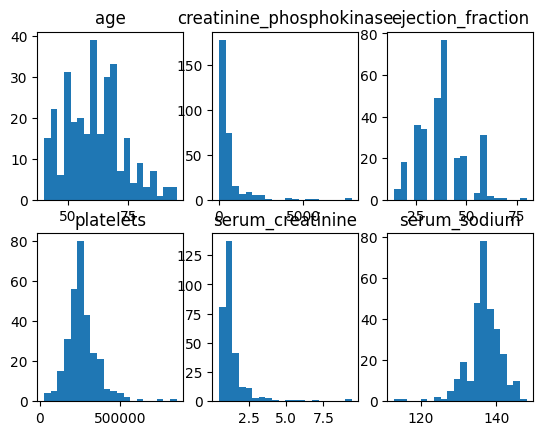

In [26]:
n_bins = 20
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(df['age'].values, bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(df['creatinine_phosphokinase'].values, bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(df['ejection_fraction'].values, bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(df['platelets'].values, bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(df['serum_creatinine'].values, bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(df['serum_sodium'].values, bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

In [29]:
data = df.to_numpy(dtype='float')

scaler = preprocessing.StandardScaler().fit(data[:150,:])
data_scaled = scaler.transform(data)
print(f"{data = }\n{data_scaled = }")

data = array([[7.5000000e+01, 5.8200000e+02, 2.0000000e+01, 2.6500000e+05,
        1.9000000e+00, 1.3000000e+02],
       [5.5000000e+01, 7.8610000e+03, 3.8000000e+01, 2.6335803e+05,
        1.1000000e+00, 1.3600000e+02],
       [6.5000000e+01, 1.4600000e+02, 2.0000000e+01, 1.6200000e+05,
        1.3000000e+00, 1.2900000e+02],
       ...,
       [4.5000000e+01, 2.0600000e+03, 6.0000000e+01, 7.4200000e+05,
        8.0000000e-01, 1.3800000e+02],
       [4.5000000e+01, 2.4130000e+03, 3.8000000e+01, 1.4000000e+05,
        1.4000000e+00, 1.4000000e+02],
       [5.0000000e+01, 1.9600000e+02, 4.5000000e+01, 3.9500000e+05,
        1.6000000e+00, 1.3600000e+02]])
data_scaled = array([[ 9.68155915e-01, -2.11418177e-02, -1.37635007e+00,
        -1.81590286e-02,  3.25269804e-01, -1.42156934e+00],
       [-6.38297484e-01,  6.09698531e+00,  4.09019337e-03,
        -3.52287805e-02, -3.60591670e-01, -9.98623091e-02],
       [ 1.64929216e-01, -3.87607463e-01, -1.37635007e+00,
        -1.08893648e+00, -1

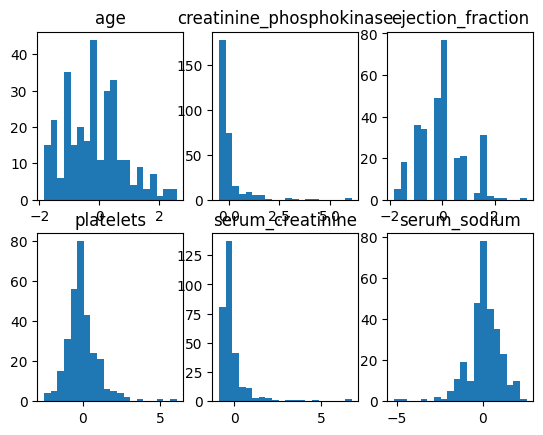

In [22]:
fig, axs = plt.subplots(2,3)
axs[0, 0].hist(data_scaled[:,0], bins = n_bins)
axs[0, 0].set_title('age')
axs[0, 1].hist(data_scaled[:,1], bins = n_bins)
axs[0, 1].set_title('creatinine_phosphokinase')
axs[0, 2].hist(data_scaled[:,2], bins = n_bins)
axs[0, 2].set_title('ejection_fraction')
axs[1, 0].hist(data_scaled[:,3], bins = n_bins)
axs[1, 0].set_title('platelets')
axs[1, 1].hist(data_scaled[:,4], bins = n_bins)
axs[1, 1].set_title('serum_creatinine')
axs[1, 2].hist(data_scaled[:,5], bins = n_bins)
axs[1, 2].set_title('serum_sodium')
plt.show()

In [37]:
print(f"{scaler.mean_ = }\n{scaler.var_ = }")

scaler.mean_ = array([6.29466667e+01, 6.07153333e+02, 3.79466667e+01, 2.66746749e+05,
       1.52060000e+00, 1.36453333e+02])
scaler.var_ = array([1.54997156e+02, 1.41548882e+06, 1.70023822e+02, 9.25286050e+09,
       1.36052697e+00, 2.06078222e+01])


## Задание 1  

Предположим X и Y две случайные переменные отражающие возраст и вес, соответственно. Рассмотрим случайную выборку из 20 наблюдений  

X = \[69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76\]
Y = \[153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140,  150, 165, 185, 210, 220\]

Необходимо:
1. **Найти среднее, медиану и моду величины X**
2. **Найти дисперсию Y**
3. **Построить график нормального распределения для X**
4. Найти вероятность того, что возраст больше 80
5. Найти двумерное мат. ожидания и ковариационную матрицу для этих двух величин
6. Определять корреляцию между X и Y
7. **Построить диаграмму рассеяния, отображающая зависимость между возрастом и весом**


1. **Найти среднее, медиану и моду величины X**

|  | Среднее | Медиана | Мода |
| --- | --- | --- | --- |
| X | 71.45 | 71.5 | 74.0 |

In [3]:
print(f"mean\n{df.mean()}\n\nmedian\n{df.median()}\n\nmode\n{df.mode()}")

mean
X     71.45
Y    164.70
dtype: float64

median
X     71.5
Y    154.0
dtype: float64

mode
      X    Y
0  74.0  140
1   NaN  150
2   NaN  185


2. **Найти дисперсию Y**

**Дисперсия Y 1441.273684**

In [4]:
print(f"Variance\n{df.var()}")

Variance
X      14.576316
Y    1441.273684
dtype: float64


3. **Построить график нормального распределения для X**


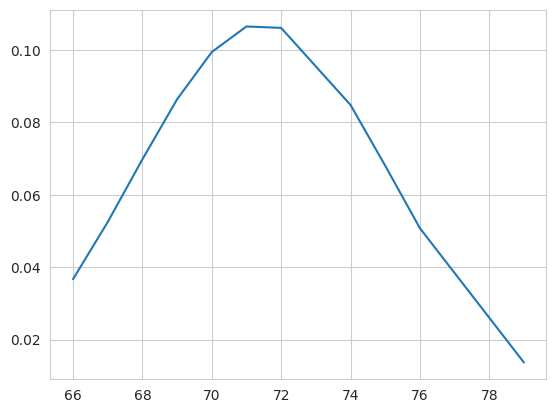

In [44]:
X = [69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76]
mean_X = sum(X)/len(X)
var_X = sum(map(lambda x: (x - mean_X)**2, X))/len(X)

Y = [153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140,  150, 165, 185, 210, 220]
mean_Y = sum(Y)/len(Y)
var_Y = sum(map(lambda y: (y - mean_Y)**2, Y))/len(Y)

sd = np.std(X)
sorted_X = sorted(X)

norm_X = norm(X)

plt.plot(sorted_X, norm(loc=mean_X, scale=sd).pdf(sorted_X))
plt.show()


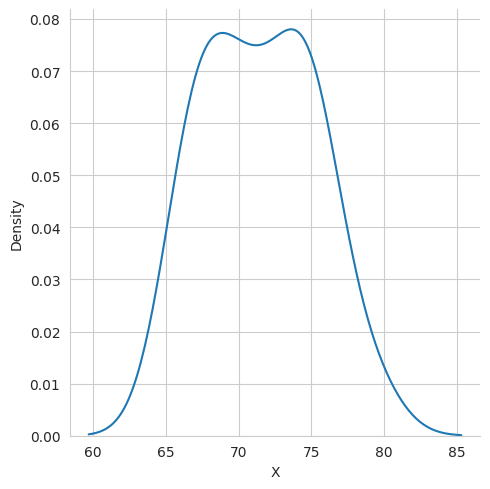

In [8]:
sb.displot(df, x='X', y=None, kind="kde")

4. Найти вероятность того, что возраст больше 80



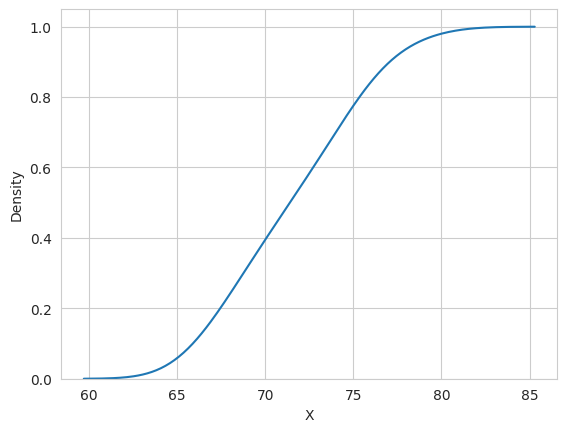

In [9]:
axes = sb.kdeplot(df, x='X', cumulative=True)

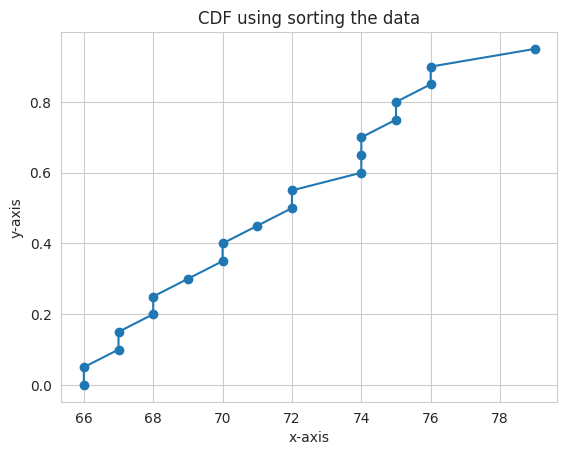

In [10]:
# defining the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
# No of data points used
N = len(data['X'])  
# sort the data in ascending order
x = np.sort(data['X'])
# get the cdf values of y
y = np.arange(N) / float(N)
# plotting
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('CDF using sorting the data')
plt.plot(x, y, marker='o')

In [11]:
for (age, p) in zip(x, y):
    print(age, p)

66 0.0
66 0.05
67 0.1
67 0.15
68 0.2
68 0.25
69 0.3
70 0.35
70 0.4
71 0.45
72 0.5
72 0.55
74 0.6
74 0.65
74 0.7
75 0.75
75 0.8
76 0.85
76 0.9
79 0.95


Вероятность почти нулевая

5. Найти двумерное мат. ожидания и ковариационную матрицу для этих двух величин



6. Определять корреляцию между X и Y



7. **Построить диаграмму рассеяния, отображающая зависимость между возрастом и весом**


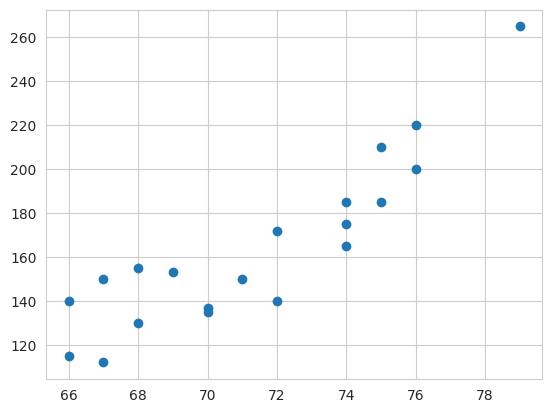

In [28]:
X = [69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76]
Y = [153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140,  150, 165, 185, 210, 220]



plt.scatter(X, Y)
plt.show()


## Задание 2  

Для следующего набора данных


|  | X1 | X2 | X3 |
| :---: | :----: | :---: | :---: |
| a | 17 | 17 | 12 |
| b | 11 | 9 | 13 |
| c | 11 | 8 | 19 |

Рассчитайте ковариационную матрицу и обобщенную дисперсию

## Задание 3  

Даны два одномерных нормальных распределения $N_a$ и $N_b$ с мат. ожиданиями $4, 8$ и СКО $1, 2$ соответственно.

**Для каждого из значения ${5,6,7}$ определите какое из распределений сгенерировало значение с большей вероятностью.**

Найди значение, которой могло быть сгенерировано обеими распределениями с равной вероятностью

PDF: $$f_{\mu, \sigma}(x) = \frac{1}{\sqrt{2\pi*\sigma^2}}*e^{-\frac{1}{2}*(\frac{x-\mu}{\sigma})^2}$$

In [77]:
import math
from scipy.optimize import fmin_powell

def f_x(mu, sigma):
    return lambda x: 1/(math.sqrt(2*math.pi*sigma**2)) * math.e**(-0.5*((x-mu)/sigma)**2)

na = f_x(4, 1)
nb = f_x(8, 2)
ndelta = lambda x: abs(na(x[0])-nb(x[0]))

print(fmin_powell(ndelta, np.array([5.66])))

for x in [5, 6, 7]:
    f_a = na(x)
    f_b = nb(x)
    print(f"x = {x}\tN_a:{f_a:f}\tN_b:{f_b:f}")

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 153
[5.65990966]
x = 5	N_a:0.241971	N_b:0.064759
x = 6	N_a:0.053991	N_b:0.120985
x = 7	N_a:0.004432	N_b:0.176033


![image](task3)

С равной вероятностью могло быть сгенерировано число 5.66